<a href="https://colab.research.google.com/github/Deepak-Katchi/Clustering-YouTube-videos/blob/master/EDA_and_ML_on_YouTube_trending_videos_INDIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Overview

To categorise given set of videos.

# About the dataset:

Youtube is a video-sharing application that allows users to upload, view, rate, share, add to favourites, report, comment on videos. It maintains a list of top trending videos.

This dataset is a daily record of the top trending YouTube videos from India with up to 200 listed trending videos per day.

The complete dataset can be downloaded from https://www.kaggle.com/datasnaek/youtube-new

In [0]:
from google.colab import drive
#drive.mount('/content/gdrive')

# Data Overview

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud
import pickle
import re
warnings.filterwarnings("ignore")

In [0]:
#df=pd.read_csv("data_files/INVideos.csv")

In [0]:
!cp gdrive/'My Drive'/case_study_youtube/INvideos.csv .

In [5]:
!ls

gdrive	INvideos.csv  sample_data


In [0]:
df=pd.read_csv("INvideos.csv")

In [7]:
print(df.shape)

(37352, 16)


In [8]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


**Observation**

The dataset contains 37352 data points each with 16 features.

Let's analyze each column

In [9]:
(df.columns)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

**Observation**

The dataset contains columns video_id,trending_date and so on which are self explanatory

# **Filling NaN values**

In [10]:
df.columns[df.isna().any()]

Index(['description'], dtype='object')

Dataframe has NaN values only in the description column. Lets replace NaN with empty string 

In [0]:
df.fillna(" ",inplace=True)

# **De Duplication**

In [12]:
print("Number of duplicate rows : ",list(df.duplicated()).count(True))

Number of duplicate rows :  4263


In [13]:
print(4263/df.shape[0])

0.11413043478260869


**Observation**

Number of duplicate rows : 423 out of 37352 i.e., 11.4% data

In [0]:
df=df.drop_duplicates()

In [15]:
print(df.shape)

(33089, 16)


In [16]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,33089.000000,3.308900e+04,3.308900e+04,3.308900e+04,33089.000000
mean,21.628154,9.963425e+05,2.558762e+04,1.576535e+03,2524.777660
std,6.493615,3.148111e+06,9.647320e+04,1.689573e+04,14769.825108
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000
25%,23.000000,1.127190e+05,7.870000e+02,9.800000e+01,72.000000
50%,24.000000,2.750270e+05,2.757000e+03,2.890000e+02,298.000000
75%,24.000000,7.320220e+05,1.201100e+04,9.320000e+02,1169.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000


# Exploratory Data Analysis

## Univariate Analysis - Views

In [17]:
most_viewed=(df[df['views']==df['views'].max()])
print("Most viewed video:")
for i in ['title','views']:
  print("{} : {}".format(i,most_viewed[i].values[0]))

Most viewed video:
title : YouTube Rewind: The Shape of 2017 | #YouTubeRewind
views : 125432237


In [18]:
least_viewed=(df[df['views']==df['views'].min()])
print("Least viewed video:")
for i in ['title','views']:
  print("{} : {}".format(i,least_viewed[i].values[0]))

Least viewed video:
title : Baapmanus - बापमाणूस - Episode 118  - May 01, 2018 - Preview
views : 4024


Mean of views: 996342.5065731814
Let us look at the plot of videos vs views


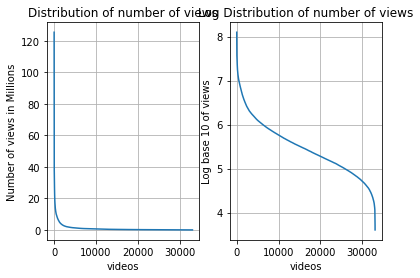

In [19]:
print("Mean of views:",df['views'].mean())
desc_view_counts=df.sort_values(by=['views'],ascending=False)['views']
print("Let us look at the plot of videos vs views")
plt.subplot(1,2,1)
plt.plot(range(1,df.shape[0]+1),(desc_view_counts)/1000000)
plt.title("Distribution of number of views")
plt.grid()
plt.xlabel("videos")
plt.ylabel("Number of views in Millions")

plt.subplot(1,2,2)
plt.plot(range(1,df.shape[0]+1),np.log10(desc_view_counts))
plt.title("Log Distribution of number of views")
plt.grid()
plt.xlabel("videos")
plt.ylabel("Log base 10 of views")

plt.show()

**Observation**

1.Majority of  videos have views in the range of 100000 to 1000000

Lets try to zoom into the first curve
Considering top 1000 most viewed videos


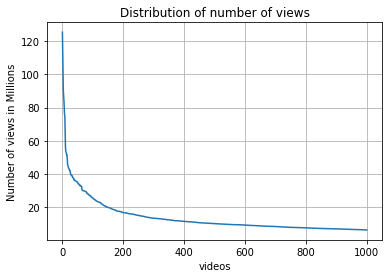

In [20]:
print("Lets try to zoom into the first curve")
desc_view_counts=df.sort_values(by=['views'],ascending=False)['views']
print("Considering top 1000 most viewed videos")
plt.plot(range(1,1000+1),(desc_view_counts[:1000])/1000000)
plt.title("Distribution of number of views")
plt.grid()
plt.xlabel("videos")
plt.ylabel("Number of views in Millions")

plt.show()

Around 200 videos have more than 20 Million Views

Lets try to further zoom into the first curve
Considering top 200 most viewed videos


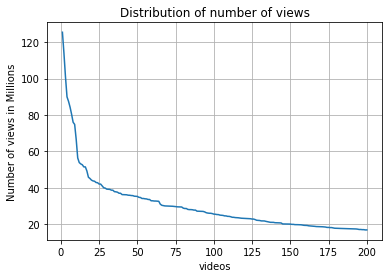

In [21]:
print("Lets try to further zoom into the first curve")
desc_view_counts=df.sort_values(by=['views'],ascending=False)['views']
print("Considering top 200 most viewed videos")
plt.plot(range(1,200+1),(desc_view_counts[:200])/1000000)
plt.title("Distribution of number of views")
plt.grid()
plt.xlabel("videos")
plt.ylabel("Number of views in Millions")

plt.show()

Only 20 videos have more than 40 Million views

## Univariate Analysis - Likes

In [22]:
print("Most liked video")
df[df['likes']==df['likes'].max()][["title","description","likes","views","trending_date"]]

Most liked video


,title,description,likes,views,trending_date
5408,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,"YouTube Rewind 2017. Celebrating the videos, p...",2912710,125432237,17.12.12


In [23]:

least_liked=df[df['likes']==df['likes'].min()][["title","description","likes","views","trending_date"]]
print("Number of videos with zero likes : ",least_liked.shape[0])
print("Sample of such videos :\n",least_liked['title'].head(3))

Number of videos with zero likes :  711
Sample of such videos :
 34    Breaking News IT Raid - நடந்தது என்ன? சிக்கியத...
36    కెమెరాలో రికార్డ్ అయిన ఈ అద్భుతాన్ని చూస్తే ఆశ...
43    Akkineni Nagarjuna Response On Annapurna Studi...
Name: title, dtype: object


Mean of likes: 25587.621052313458
Let us look at the plot of videos vs likes


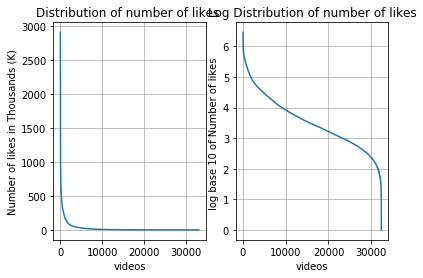

In [24]:
print("Mean of likes:",df['likes'].mean())
desc_likes_counts=df.sort_values(by=['likes'],ascending=False)['likes']
print("Let us look at the plot of videos vs likes")
plt.subplot(1,2,1)
plt.plot(range(1,df.shape[0]+1),(desc_likes_counts//1000))
plt.title("Distribution of number of likes ")
plt.grid()
plt.xlabel("videos")
plt.ylabel("Number of likes in Thousands (K)")

plt.subplot(1,2,2)
plt.plot(range(1,df.shape[0]+1),np.log10(desc_likes_counts))
plt.title("Log Distribution of number of likes")
plt.grid()
plt.xlabel("videos")
plt.ylabel("log base 10 of Number of likes ")
plt.show()

Let us zoom into the first cuvre and look at the plot of videos vs likes for 1000 most liked videos


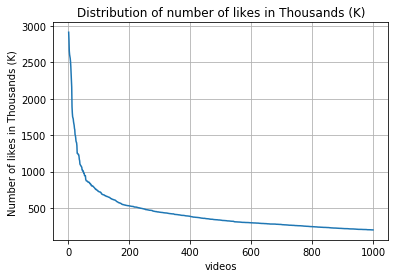

In [25]:
desc_likes_counts=df.sort_values(by=['likes'],ascending=False)['likes']
print("Let us zoom into the first cuvre and look at the plot of videos vs likes for 1000 most liked videos")
plt.plot(range(1,1000+1),(desc_likes_counts[:1000])//1000)
plt.title("Distribution of number of likes in Thousands (K)")
plt.grid()
plt.xlabel("videos")
plt.ylabel("Number of likes in Thousands (K) ")
plt.show()

Majority of the videos have like count less than 500 K

## Bi Variate Analysis

### PairPlots

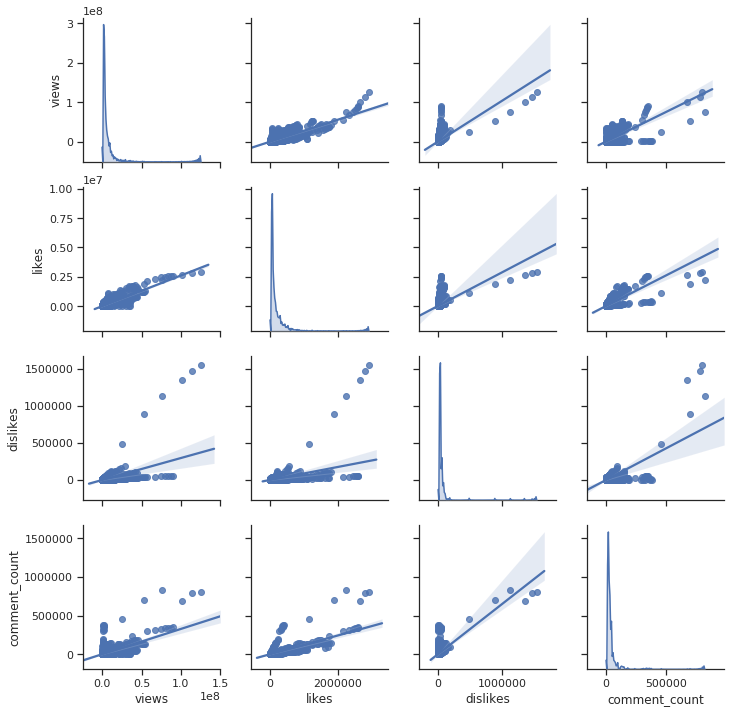

In [26]:
sns.set(style="ticks", color_codes=True)
data = df[['views','likes','dislikes','comment_count']]
g = sns.pairplot(data,diag_kind="kde",kind='reg')

**Observation**


The above pair plots infer that the features views and likes are linearly related.

### Heatmap

To get a better understanding of how these features are related, we plot a heatmap where each block represents the correlation value of corresponding row and column features

In [0]:
corr_mat=df[['views','likes','dislikes','comment_count']].corr()

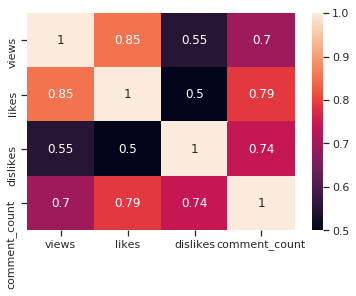

In [28]:
sns.heatmap(corr_mat,annot=True,robust =True)

** Observation **
The features views and likes are higly correlated.  


##  Univariate Analysis - YouTube Channel

In [29]:
unq_chn_count=len(list(df['channel_title'].unique()))
print(unq_chn_count)

1426


Of the entire dataset there are 1426 unique  channels

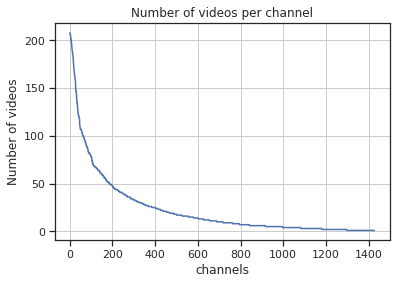

In [30]:
plt.plot(range(1,unq_chn_count+1),list(df['channel_title'].value_counts()))
plt.title("Number of videos per channel")
plt.grid()
plt.xlabel("channels")
plt.ylabel("Number of videos")
plt.show()

In [31]:
print("Top 10 Channels with more videos in trending\n\nChannel\t\t\tVideos count\n\n",df['channel_title'].value_counts()[0:10])

Top 10 Channels with more videos in trending

Channel			Videos count

 VikatanTV             208
ETV Plus India        206
SAB TV                206
etvteluguindia        205
Flowers Comedy        202
Study IQ education    202
Tarang TV             199
SET India             199
Mazhavil Manorama     196
RadaanMedia           193
Name: channel_title, dtype: int64


## No of days in trending

In [32]:
print(len(df['title'].unique()))

16721


In [33]:
16721/df.shape[0]

0.5053340989452688

Out of 33089 rows there are 16721 (50.53%) unique titles. This means that there are many videos listed in trending for more than one day. Lets figure out the numbers in detail

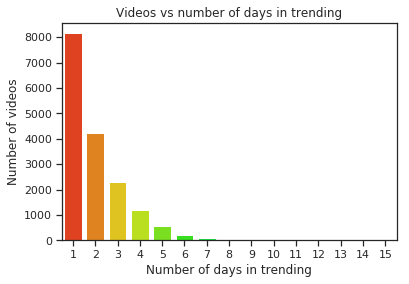

In [34]:
sns.countplot(df['title'].value_counts(), palette='gist_rainbow')
plt.title("Videos vs number of days in trending")
plt.ylabel("Number of videos")
plt.xlabel("Number of days in trending")
plt.show()

In [35]:
len(df['title'].value_counts())

16721

** Observation ** 

Out  of 16721 unique videos, 

1. 8000 videos have been in trending only for one day.

2. Around 4000 videos have been in trending for two days. Very few videos are in trending for more than 5 days


In [36]:
print("Videos trending for many days\t\t\t\t\t\t\tNumber of days in trending\n\n",df['title'].value_counts()[0:10])

Videos trending for many days							Number of days in trending

 Nandhini | Today @ 9 pm | Sun TV                                                                     15
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures                         14
Sanju | Official Teaser | Ranbir Kapoor | Rajkumar Hirani                                            13
Kasthooriman || General Promo || Mon to Sat at 8:30 PM || Asianet                                    12
School Ke Wo Din - Amit Bhadana                                                                      11
Sanju | Official Trailer | Ranbir Kapoor | Rajkumar Hirani | Releasing on 29th June                  10
Kaala (Tamil) - Official Teaser | Rajinikanth | Pa Ranjith | Dhanush | Santhosh Narayanan            10
Official Video: Raat Kamaal Hai | Guru Randhawa & Khushali Kumar | Tulsi Kumar | New Song 2018       10
Kinjal Dave - Moj Ma ( Ghate To Zindagi Ghate ) | Latest Gujarati New Song 2018  | Raghav Digital     9

## Number of days to reach trending

In [0]:
df['days_publish_to_trending']=((pd.to_datetime(df['trending_date'].map(lambda x : '20'+x),format='%Y.%d.%m')) - pd.to_datetime(df['publish_time'].map(lambda x : x[0:10]),format='%Y-%m-%d')).map(lambda x:x.days)

In [0]:
df_unique_titles=df

In [39]:
df_unique_titles.drop_duplicates(subset=['title','publish_time'], keep='first', inplace=False)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,days_publish_to_trending
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,2
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",1
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,2
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,2
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,1
5,il_pSa5l98w,17.14.11,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10T04:29:50.000Z,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,https://i.ytimg.com/vi/il_pSa5l98w/default.jpg,False,False,False,Watch MCA- Middle Class Abbayi First Look Teas...,4
6,7MxiQ4v0EnE,17.14.11,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11T16:41:15.000Z,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...,3
7,c64I9HNpiOY,17.14.11,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,T-Series,10,2017-11-11T06:14:19.000Z,"Ek Dil Ek Jaan Video Song|""'Ek Dil Ek Jaan'""|""...",10588371,132738,8812,10847,https://i.ytimg.com/vi/c64I9HNpiOY/default.jpg,False,False,False,Presenting the song 'Ek Dil Ek Jaan' from Padm...,3
8,KObFEYCaRx8,17.14.11,Chiranjeevi in Naga Chaitanya - Samantha Recep...,Top Telugu Media,24,2017-11-13T04:42:26.000Z,Chiranjeevi in Naga Chaitanya - Samantha Recep...,118223,520,53,23,https://i.ytimg.com/vi/KObFEYCaRx8/default.jpg,False,False,False,Chiranjeevi in Naga Chaitanya - Samantha Recep...,1
9,g8QsfJhFpjY,17.14.11,New bike vs Old bike - the reality,Jump Cuts,24,2017-11-12T04:30:01.000Z,"Jump cuts|""Jumpcuts""|""Tamil comedy""|""Tamil Com...",969030,59798,1545,2404,https://i.ytimg.com/vi/g8QsfJhFpjY/default.jpg,False,False,False,Jump Cuts is a Tamil entertaining group by Har...,2


In [40]:
df_unique_titles.shape

(33089, 17)

In [41]:
len(list(df_unique_titles['title'].unique()))

16721

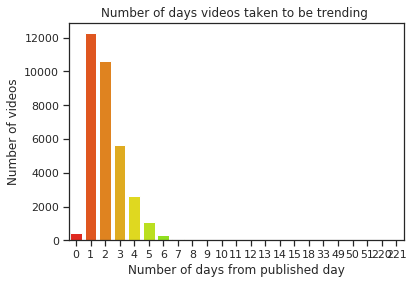

In [42]:
sns.countplot(df['days_publish_to_trending'], palette='gist_rainbow')
plt.title("Number of days videos taken to be trending ")
plt.ylabel("Number of videos")
plt.xlabel("Number of days from published day")
plt.show()

** Observation **

1. Very few videos have been in trending from the date of publishing

2. Mos of the videos reached trending in 1 or 2 days from the date of publishing

In [43]:
print("Videos trending on the day of publishing\n\n",df[df['days_publish_to_trending']==0][['title','views']].head(10))

Videos trending on the day of publishing

                                                   title   views
431   गुरुवार स्पेशल भजन : साईं बाबा रहमत की नज़र कर ...   66756
2373  RAMAYANAM PART- 7 | Bahubali Ramayanam | Unkno...   52202
2903  Dil De Kareeb | Garry Sandhu ( Full Video ) | ...  283742
3681  RAMAYANAM PART - 10 | CLIMAX | Unknown Facts A...   60051
5333  हनुमान चालीसा, Hanuman Chalisa Hari Om Sharan ...   36535
5524                 Gaali Vaaluga - A Tribute To #PSPK  355545
5554  क्या आप इस जगह पर उड़ सकते हो ? | 3 Places Wher...   56738
6499                                   ABP News is LIVE  631744
6717  Brock Lesnar's Royal Rumble challengers reveal...  899815
6720  Brock Lesnar  - Braun strowman -  Kane | WWe R...  223886


## Category ID

This column is used as output labels in case of supervised learning

In [44]:
unq_cat_ids_cnt=len(list(df['category_id'].unique()))
print(unq_cat_ids_cnt)

17


All the 33k odd videos are categorised into a total of 17 categories

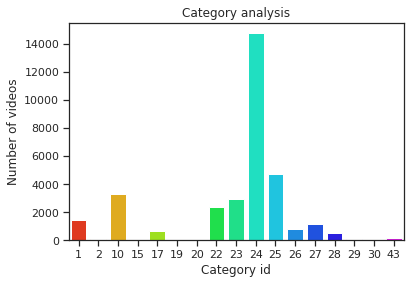

In [45]:
sns.countplot(df['category_id'], palette='gist_rainbow')
plt.title("Category analysis")
plt.ylabel("Number of videos")
plt.xlabel("Category id")
plt.show()

In [46]:
print(df['category_id'].value_counts())

24    14764
25     4709
10     3292
23     2967
22     2367
1      1463
27     1166
26      801
17      646
28      517
43      149
29      103
2        69
20       55
30       10
19        8
15        3
Name: category_id, dtype: int64


In [47]:
14764/df.shape[0]

0.44619057692888875

** Observation **


The dataset is highly imbalanced with the category with id 24 has 44.6% of total videos.


In [48]:
df.shape

(33089, 17)

# Storing de duplicated data

In [49]:
df.shape

(33089, 17)

We sort the dataset based on publish_time and trending_date in ascending order.

In [0]:
df=df.sort_values(by=['publish_time','trending_date'])

In [0]:
pickle_out = open("deduplicated_data.pickle","wb")
pickle.dump(df, pickle_out)
pickle_out.close()

# Pre Processing

We remove  the following from Text as part of processing

-  URLs
-  newline characters
-  Special Characters like !@#$%^& and others
-  Extra spaces

Then we convert entire text to lower case

In [0]:
def text_preprocess(data):
    data=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"", data)
    data=re.sub(r'\\n+'," ",data)
    data=data.replace("|"," ")
    data=re.sub(r'[?|!|\'|"|#|,|-|@|(|)|$|%|^|&|*|+|_|=|,|<|>]', "", data)
    data=data.replace(": "," ").replace("-"," ").replace(" :"," ")
    data=re.sub(r' +',' ',data).lower()
    return data
def channel_preprocess(data):
    data=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"", data)
    data=re.sub(r'\\n+'," ",data)
    data=data.replace("|"," ")
    data=re.sub(r'[?|!|\'|"|#|,|-|@|(|)]', "", data)
    data=data.replace(":","").replace("-","")
    data=re.sub(r' ','',data).lower()
    return data

In [53]:
df.shape

(33089, 17)

We define new feature called Text_Feature which is the string concatenation of title,three times tags,channel_title and description. We apply the preprocess function on this new feature

In [0]:
df_1=df
df_1['channel_title']=df_1['channel_title'].map(lambda x : channel_preprocess(x))
df_1['tags']=df_1['channel_title'].map(lambda x : text_preprocess(x))
df_1["Text_Feature"]=df_1.title+" "+df_1.tags+" "+df_1.tags+" "+df_1.tags+" "+df_1.channel_title+" "+df_1.channel_title+" "+df_1.channel_title+" "+df_1.description
#df_1=df_1.drop(columns=['title','channel_title','tags','description','video_id','comments_disabled', 'ratings_disabled','thumbnail_link', 'video_error_or_removed'])

In [0]:
df_1['Text_Feature']=df_1['Text_Feature'].map(lambda x : text_preprocess(x))

In [56]:
df_1.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'days_publish_to_trending',
       'Text_Feature'],
      dtype='object')

In [0]:
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime

# Train and Test Data Split in 70:30

In [58]:
df_1.shape

(33089, 18)

In [59]:
int(df_1.shape[0]*0.7)

23162

Since this is a time series data (sorted by published date and trending date), instead of random split, we take first 70% data as train data and the rest 30% as test data 

In [0]:
x_train=df_1['Text_Feature'][0:int(df_1.shape[0]*0.7)]

In [0]:
x_test=df_1['Text_Feature'][int(df_1.shape[0]*0.7):]

In [0]:
y_train=df['category_id'][0:int(df_1.shape[0]*0.7)]
y_test=df['category_id'][int(df_1.shape[0]*0.7):]

In [63]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(23162,) (23162,)
(9927,) (9927,)


In [64]:
x_train

9377     drunk and drive test to anchor pradeep ali all...
9618     drunk and drive test to anchor pradeep ali all...
17       tiger zinda hai official trailer salman khan k...
262      tiger zinda hai official trailer salman khan k...
545      tiger zinda hai official trailer salman khan k...
113      abhishek bachchan lashes out as paparazzi clic...
189      घर में चुपचाप यहाँ रख दे एक लौंग इतना बरसेगा प...
154      sanjay leela bhansali speaks padmavati ranveer...
178      thatrom thookrom demonetizationanthem str kabi...
196      every arranged marriage ever ft. rajkummar rao...
101      filtercopy types of men you meet on a date ft....
76       haq se qarib qarib singlle featuring irrfan kh...
379      haq se qarib qarib singlle featuring irrfan kh...
90       ed sheeran perfect official music video edshee...
377      ed sheeran perfect official music video edshee...
63       aruvi official teaser arun prabu bindhu malini...
116      इन 7 राशियों की चमकेगी किस्मतगुरु का होगा उदय .

In [65]:
df_1.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'days_publish_to_trending',
       'Text_Feature'],
      dtype='object')

#Vectorising Data

- We vectorise data i.e., the column text feature using two methods

## 1. Vectorising using Word2Vec

In [0]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle


# Train your own Word2Vec model using your own text corpus
list_of_sent=[]
for sent in x_train.values:
    list_of_sent.append(sent.split())

In [0]:
test_list_of_sent=[]
for sent in x_test.values:
    test_list_of_sent.append(sent.split())

In [0]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [69]:
print(w2v_model)

Word2Vec(vocab=29061, size=50, alpha=0.025)


In [0]:
w2v_words = list(w2v_model.wv.vocab)

In [71]:
len(w2v_words)

29061

In [72]:
w2v_model.wv.most_similar('music')

[('music.', 0.7412186861038208),
 ('lyrics', 0.6502991318702698),
 ('sung', 0.6278674602508545),
 ('teji', 0.6187021732330322),
 ('sanj', 0.6148681640625),
 ('bilal', 0.6064631938934326),
 ('ranjit', 0.6047021150588989),
 ('punjabi', 0.6016245484352112),
 ('gagan', 0.5997546911239624),
 ('songs', 0.597858726978302)]

In [0]:
from tqdm import tqdm

In [0]:
# average Word2Vec
# compute average word2vec for each review.
def avgw2v(list_of_sent):
    sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sent in tqdm(list_of_sent): # for each review/sentence
        sent_vec = np.zeros(50) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            if word in w2v_words:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        sent_vectors.append(sent_vec)
    print(len(sent_vectors))
    print(len(sent_vectors[0]))
    return sent_vectors

In [75]:
sent_vect=avgw2v(list_of_sent)

100%|██████████| 23162/23162 [05:07<00:00, 75.39it/s]

23162
50


In [76]:
test_sent_vect=avgw2v(test_list_of_sent)

100%|██████████| 9927/9927 [02:47<00:00, 59.35it/s]

9927
50


In [0]:
std = StandardScaler()
std.fit(sent_vect)
train_w2v=std.transform(sent_vect)
test_w2v=std.transform(test_sent_vect)


In [0]:
pickle_out = open("train_w2v.pickle","wb")
pickle.dump(train_w2v, pickle_out)
pickle_out.close()

In [0]:
pickle_out = open("test_w2v.pickle","wb")
pickle.dump(test_w2v, pickle_out)
pickle_out.close()

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from prettytable import PrettyTable
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

##  2. Vectorising Using TF Vectorizer

In [0]:
tfidf_vect = TfidfVectorizer(max_features=200000, ngram_range=(1,3))
tfidf_train_data = tfidf_vect.fit_transform(x_train.values)
tfidf_test_data = tfidf_vect.transform(x_test.values)


In [82]:
stdscaler=StandardScaler(with_mean = False)
tfidf_train_data = stdscaler.fit_transform(tfidf_train_data)
tfidf_test_data = stdscaler.transform(tfidf_test_data)
print(tfidf_train_data.shape)
print(tfidf_test_data.shape)

(23162, 200000)
(9927, 200000)


# ML Models

# Supervised Learning 

# ML Problem

To perform multiclass classification on the given dataset.


# Evaluation Metrtic

Since the dataset is highly imbalanced we choose F1- Micro score as the scoring parameter.

# Custom function to perform cross validation

- Here we perform 5 split timeseries grid search cross validation for a given model on the train data with score as f1_micro

- Then we determine best params, best train score , test score with best model and return all scores and parameters as a dictionary

In [0]:
def perform_cv(model,parameters,x_train,y_train,x_test,y_test,nsplits=5):
    #3 fold cv using time series split
    tscv=TimeSeriesSplit(n_splits=nsplits)
    cv_model = GridSearchCV(model, param_grid=parameters, cv=tscv, verbose=1, n_jobs=-1,scoring='f1_micro')
    cv_model.fit(x_train,y_train)
    results={}
    results['model']=cv_model
    
    results['best_estimator']=cv_model.best_estimator_
    print('\nBest Estimator \n',cv_model.best_estimator_)
    
    results['best_params']=cv_model.best_params_
    print('\nBest Parameters:\n',cv_model.best_params_)
    
    results['best_score']=cv_model.best_score_
    print('\nBest F1 micro Cross Validation score : \n',cv_model.best_score_)
    
    y_pred = cv_model.predict(x_test)
    results['predict']=y_pred
    
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    results['accuracy']=accuracy
    print("\nTest accuracy : ",accuracy)
    
    f1_micro = metrics.f1_score(y_true=y_test, y_pred=y_pred,average='micro')
    results['f1_micro']=f1_micro
    print("\nTest F1 micro score : ",f1_micro)
    return results
    
    
    
    

## Model 1 Logistic Regression

### Using Avg W2V Data

In [0]:

parameters = {'C':[0.01, 0.1, 1, 10, 100]}
model=LogisticRegression(penalty='l2',class_weight='balanced',n_jobs=-1)
w2v_log_reg_cv_results =  perform_cv(model,parameters, train_w2v, y_train, test_w2v, y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.1min finished



Best Estimator 
 LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

Best Parameters:
 {'C': 10}

Best F1 micro Cross Validation score : 
 0.6551295336787565

Test accuracy :  0.6487357711292435

Test F1 micro score :  0.6487357711292435


### Using TFIDF Vectorised Data

In [0]:

parameters = {'C':[0.0001,0.001,0.01, 0.1, 1, 10],'penalty':['l1','l2']}
model=LogisticRegression(class_weight='balanced',n_jobs=-1)
w2v_log_reg_cv_results =  perform_cv(model,parameters, tfidf_train_data, y_train, tfidf_test_data, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 22.4min finished



Best Estimator 
 LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

Best Parameters:
 {'C': 0.001, 'penalty': 'l2'}

Best F1 micro Cross Validation score : 
 0.88

Test accuracy :  0.8647124005238239

Test F1 micro score :  0.8647124005238239


## Model 2 Linear SVM

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

###  Using Avg W2V Data

In [92]:
parameters = {'penalty':['l2', 'l1','elasticnet'],'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000] }
sgd_model = SGDClassifier(class_weight ='balanced')
sgd_results_avgw2v=perform_cv(sgd_model,parameters, train_w2v, y_train, test_w2v, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   48.4s finished



Best Estimator 
 SGDClassifier(alpha=0.01, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

Best Parameters:
 {'alpha': 0.01, 'penalty': 'l2'}

Best F1 micro Cross Validation score : 
 0.6136269430051814

Test accuracy :  0.5446761357912763

Test F1 micro score :  0.5446761357912763


### Using TFIDF Vectorised Data

In [93]:
sgd_results_tfidf=perform_cv(sgd_model,parameters, tfidf_train_data, y_train, tfidf_test_data, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  3.4min finished



Best Estimator 
 SGDClassifier(alpha=10, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

Best Parameters:
 {'alpha': 10, 'penalty': 'l2'}

Best F1 micro Cross Validation score : 
 0.8767875647668394

Test accuracy :  0.8529263624458547

Test F1 micro score :  0.8529263624458547


## Model 3 KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

###  Using Avg W2V Data

In [88]:
parameters = {'n_neighbors':range(3,30,2),'weights':['distance','uniform']}
knn_model = KNeighborsClassifier()
w2v_knn_results=perform_cv(knn_model,parameters,train_w2v, y_train, test_w2v, y_test)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed: 24.3min finished



Best Estimator 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='distance')

Best Parameters:
 {'n_neighbors': 11, 'weights': 'distance'}

Best F1 micro Cross Validation score : 
 0.8128497409326425

Test accuracy :  0.7826130754507907

Test F1 micro score :  0.7826130754507907


### Using TFIDF Vectorised Data

In [89]:
parameters = {'n_neighbors':range(3,20,2),'weights':['distance','uniform']}
knn_model = KNeighborsClassifier()
w2v_knn_results=perform_cv(knn_model,parameters, tfidf_train_data, y_train, tfidf_test_data, y_test,nsplits=5)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 11.8min finished



Best Estimator 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='distance')

Best Parameters:
 {'n_neighbors': 15, 'weights': 'distance'}

Best F1 micro Cross Validation score : 
 0.5666839378238342

Test accuracy :  0.615090158154528

Test F1 micro score :  0.615090158154528


## Model 4 Decision Trees

###  Using Avg W2V Data

In [0]:
parameters = {'max_depth':np.arange(3,20,2),'min_samples_split':[2,3,4,5,6],'min_samples_leaf':[2,3,4,5] }
dt_model = DecisionTreeClassifier(class_weight ='balanced')
w2v_dt_results=perform_cv(dt_model,parameters, train_w2v, y_train, test_w2v, y_test)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  7.8min finished



Best Estimator 
 DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=19, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Best Parameters:
 {'max_depth': 19, 'min_samples_leaf': 2, 'min_samples_split': 2}

Best F1 micro Cross Validation score : 
 0.5845077720207253

Test accuracy :  0.5396393673818878

Test F1 micro score :  0.5396393673818878


### Using TFIDF Vectorised Data

In [0]:
parameters = {'max_depth':np.arange(5,15,2),'min_samples_split':[2,3,4,5,6],'min_samples_leaf':[2,3,4,5] }
dt_model = DecisionTreeClassifier(class_weight ='balanced')
w2v_dt_results=perform_cv(dt_model,parameters, tfidf_train_data, y_train, tfidf_test_data, y_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 14.5min finished



Best Estimator 
 DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=13, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Best Parameters:
 {'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 6}

Best F1 micro Cross Validation score : 
 0.19321243523316062

Test accuracy :  0.13297068600785736

Test F1 micro score :  0.13297068600785736


## Model 5 Random Forest Classifier

###  Using Avg W2V Data

In [86]:
parameters = {'n_estimators':[100,200,300],'max_depth':np.arange(11,20,2),'min_samples_split':[2,3,4,6],'min_samples_leaf':[2,3,4,5] }
rf_model = RandomForestClassifier(class_weight ='balanced')
w2v_rf_results=perform_cv(rf_model,parameters, train_w2v, y_train, test_w2v, y_test)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 84.5min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 161.0min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 255.7min finished



Best Estimator 
 RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=19, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

Best Parameters:
 {'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 300}

Best F1 micro Cross Validation score : 
 0.816839378238342

Test accuracy :  0.7907726402740002

Test F1 micro score :  0.7907726402740002


### Using TFIDF Vectorised Data

In [86]:
parameters = {'n_estimators':[100,300,500],'max_depth':np.arange(13,20,2),'min_samples_split':[2,3,4],'min_samples_leaf':[2,3,4] }
rf_model = RandomForestClassifier(class_weight ='balanced')
w2v_rf_results=perform_cv(rf_model,parameters, tfidf_train_data, y_train, tfidf_test_data, y_test,nsplits=2)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 35.1min finished



Best Estimator 
 RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=17, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

Best Parameters:
 {'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 500}

Best F1 micro Cross Validation score : 
 0.6060233160621762

Test accuracy :  0.5939357308350962

Test F1 micro score :  0.5939357308350962


# Conclusion - Supervised Learning


In [0]:
from prettytable import PrettyTable

In [0]:
x= PrettyTable()
x.field_names = ["Model","Avg W2V CV Score","Avg W2V Test Score","TFIDF CV Score","TFIDF Test Score"]
x.add_row(["Logistic Regression",0.6551,0.6487,0.88,0.8647])
x.add_row(["Linear SVM",0.6136,0.5446,0.8768,0.8529])
x.add_row(["KNN",0.8128,0.7826,0.5667,0.6151])
x.add_row(["Decision Trees",0.5845,0.5396,0.1932,0.1329])
x.add_row(["Random Forest",0.8168,0.7908,0.6060,0.5939])



-   As part of this approach we have performed KNN,Logistic Regression, linear SVM, Decision Tree ,Random Forest Classifier models on both TFIDF data and Avg Word2Vec vectorised data

-   It is observed that models Logistic Regression , Linear SVM, performed pretty well on large dimensional (200K dimensions) TFIDF data.

-   The model KNN performed fairly well on low dimensional data compared to performance on high dimensional data

-    Simple Decision Trees under performed on low dimensional (50 dimensions) AvgW2V and gave very poor results on high dimensional data. However the ensemble model Random Forest Classifiers performed well on low dimensional data but the training cost is more compared to that of Logistic Regression,SVM.




  

# Unsupervised Learning 

# KMeans Clustering

In [0]:
#from sklearn.metrics import silhouette_score

In [0]:
def k_means(data,cluster_range):
  models=[]
  score=[]
  loss=[]
  for k in cluster_range:
    kmeans=KMeans(n_clusters=k,init='k-means++',n_jobs=-1).fit(data)
    models.append(kmeans)
    loss.append(kmeans.inertia_)
    #score.append(silhouette_score(data,kmeans.labels_))
  plt.plot(cluster_range,loss)
  plt.xlabel('k-clusters')
  plt.ylabel('loss')
  plt.show()  
  return models

In [0]:
from collections import Counter

In [0]:
def cluster_analysis(train_data,k):
  
  
  #For each cluster
  for i in range(0,k):
    
    #Extract cleaned text column
    data=train_data[train_data['labels']==i]['Text_Feature'].values
    list_of_words=[];
    for sent in data:
      for word in sent.split():
        list_of_words.append(word)  
    final_text=" ".join(list_of_words)
    wordcloud = WordCloud(collocations=False).generate(final_text)
    plt.figure()
    title="\nCluster : "+str(i+1)+"\n Number of Videos : "+str(len(data))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
   

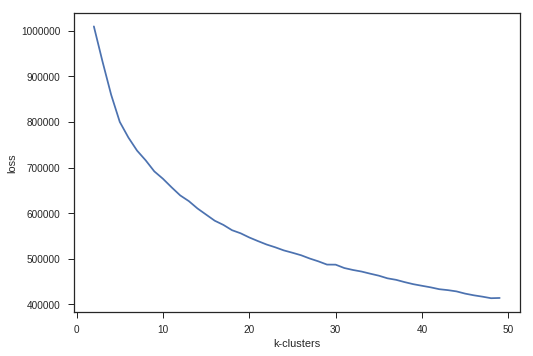

In [0]:
model_list=k_means(train_w2v,range(2,50))

*** Observation ***
Using elbow method it is observed that at k=20 the slope of curve starts decreasing. So we chose k=20 as elbow point

In [0]:
df_2=df_1.head(len(x_train))

In [0]:
df_2['labels']=model_list[18].labels_

Lets plot the word cloud of all the 20 clusters to get better insights of how datapoints have been clustered and what each cluster represents

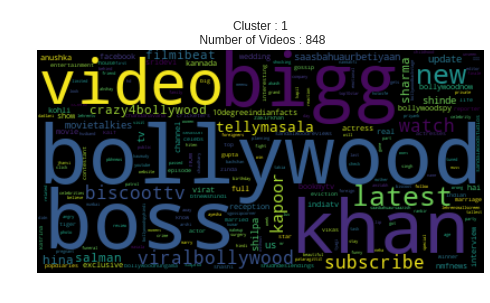

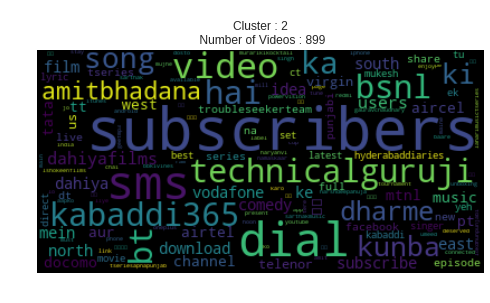

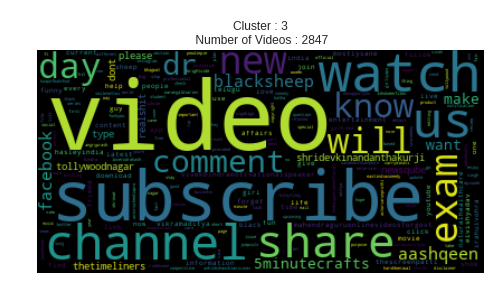

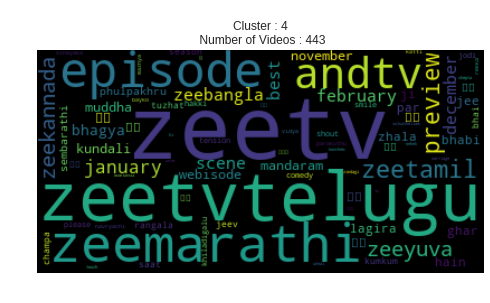

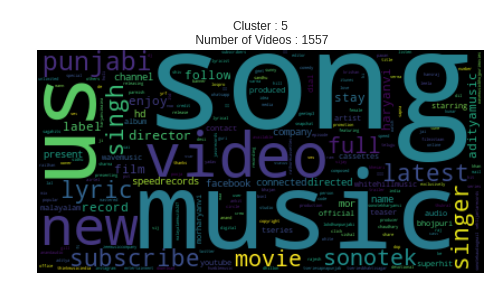

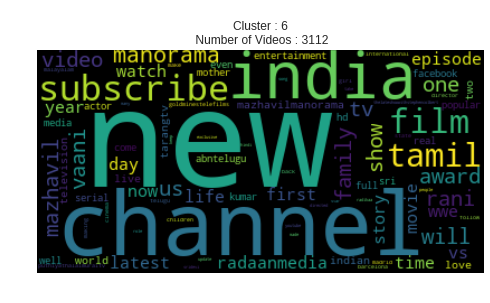

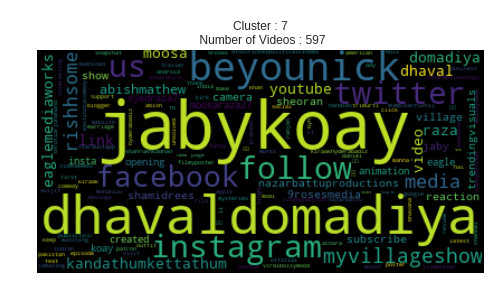

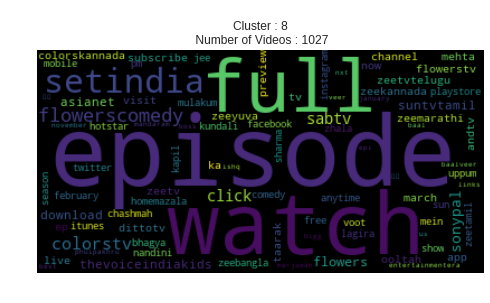

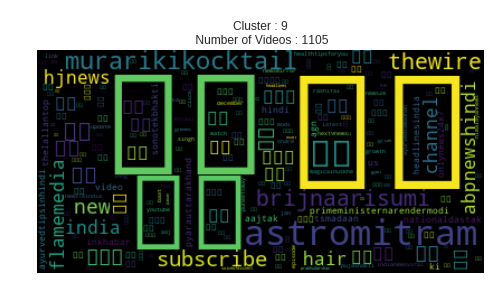

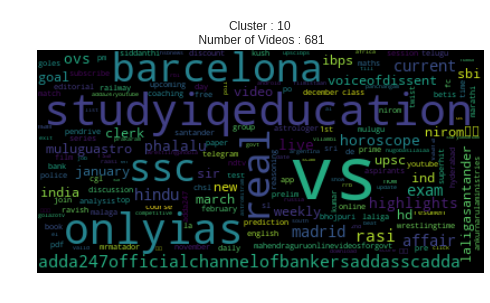

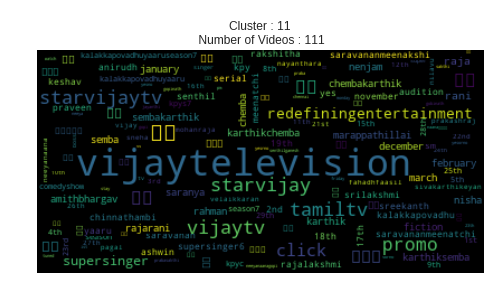

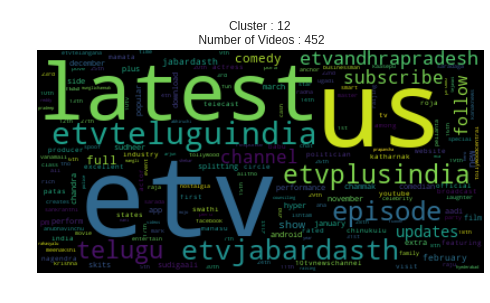

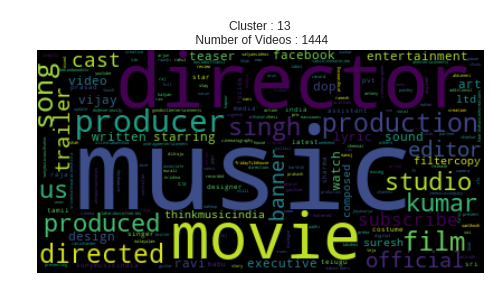

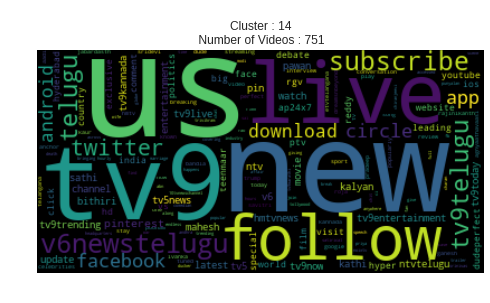

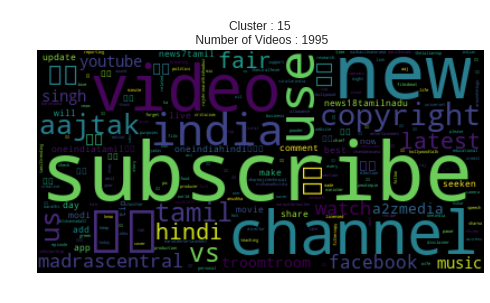

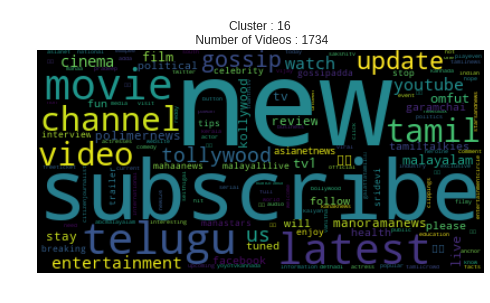

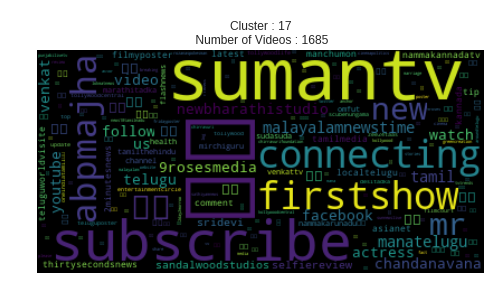

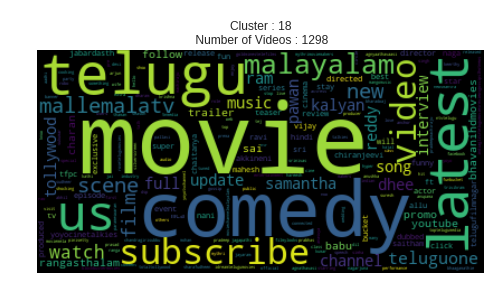

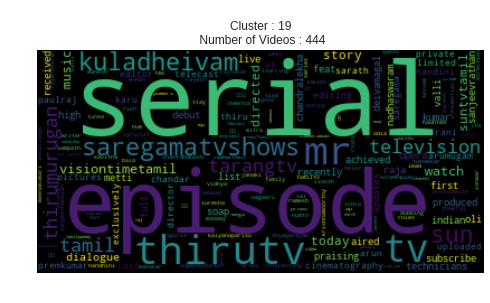

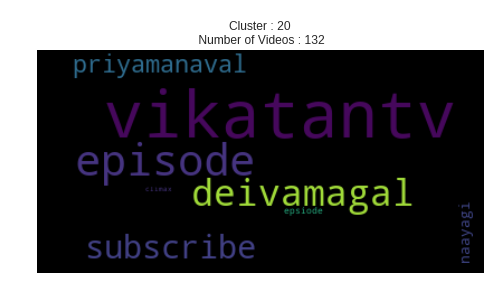

In [0]:
cluster_analysis(df_2,20)

# Saving DataFrame with cluster labels

In [0]:
pickle_out = open("final_clustered_dataframe.pickle","wb")
pickle.dump(df_2, pickle_out)
pickle_out.close()

In [0]:
#from google.colab import files
#files.download("final_clustered_dataframe.pickle")

# Conclusion - Unsupervised Learning


1.After finding the best K value using elbow method, we  applied K-Means algorithm on the data.

2.The wordclouds of clusters infer that the datapoints are clustered based on the following
-    Language : Hindi,Telugu,Tamil,Punjabi
-    Category : Movies,Songs,Television,News